In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [4]:
train='nsl-kdd/KDDTrain+.txt'
test='nsl-kdd/KDDTest+.txt'
test21='nsl-kdd/KDDTest-21.txt'
train_data=pd.read_csv(train,names=feature)

In [5]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
# remove attribute 'difficulty_level'
train_data.drop(['difficulty'],axis=1,inplace=True)
train_data.shape

(125973, 42)

In [7]:
# number of attack labels 
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [8]:
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [9]:
change_label(train_data)

In [10]:
# distribution of attack classes
train_data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

In [11]:
data = train_data.copy()

In [12]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['protocol_type']= label_encoder.fit_transform(data['protocol_type'])
data['service']= label_encoder.fit_transform(data['service'])
data['flag']= label_encoder.fit_transform(data['flag'])
data['label']= label_encoder.fit_transform(data['label'])

data['protocol_type'].unique()
data['service'].unique()
data['flag'].unique()
data['label'].unique()

array([4, 0, 2, 1, 3], dtype=int64)

In [13]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,4
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4


In [14]:
X = data.drop(["label"],axis =1)
y = data["label"]

# CCMI Feature

In [15]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

In [16]:
selector = SelectPercentile(mutual_info_classif, percentile=30)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape

(125973, 12)

In [17]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

#This code is useful for obtaining the names of the selected features after performing feature selection, which allows you to 
#understand which features are considered important by the feature selection algorithm and to use these selected features for 
#further analysis or modeling purposes

['service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate']

In [18]:
df = data[['service',
             'flag',
             'src_bytes',
             'dst_bytes',
             'count',
             'serror_rate',
             'same_srv_rate',
             'diff_srv_rate',
             'dst_host_srv_count',
             'dst_host_same_srv_rate',
             'dst_host_diff_srv_rate',
             'dst_host_serror_rate',
             'label']]
df.to_csv('processed.csv')

In [19]:
df = pd.read_csv('nslkdd_processed.csv')
df.head()

,Unnamed: 0,service,flag,src_bytes,dst_bytes,count,serror_rate,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,label
0,0,20,9,491,0,2,0.0,1.00,0.00,25,0.17,0.03,0.00,4
1,1,44,9,146,0,13,0.0,0.08,0.15,1,0.00,0.60,0.00,4
2,2,49,5,0,0,123,1.0,0.05,0.07,26,0.10,0.05,1.00,0
3,3,24,9,232,8153,5,0.2,1.00,0.00,255,1.00,0.00,0.03,4
4,4,24,9,199,420,30,0.0,1.00,0.00,255,1.00,0.00,0.00,4


In [20]:
del df['Unnamed: 0']

In [21]:
df.shape

(125973, 13)

In [22]:
X = df.drop(["label"],axis =1)
y = df["label"]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100778, 12), (100778,), (25195, 12), (25195,))

In [24]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

In [25]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

In [26]:
X_train=X_train.values
X_test=X_test.values

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [27]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# CNN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

verbose, epoch, batch_size = 1, 100, 4
activationFunction='relu'

def CNN():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(5, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = CNN()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 11, 128)           384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3205      
Total params: 3,589
Trainable params: 3,589
Non-trainable params: 0
_________________________________________________________________


In [29]:
modelhistory = cnnmodel.fit(X_train, Y_train, epochs=5, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/5
20156/20156 [==============================] - 34s 2ms/step - loss: 9196.8281 - accuracy: 0.8144 - val_loss: 3360.8621 - val_accuracy: 0.8615
Epoch 2/5
20156/20156 [==============================] - 28s 1ms/step - loss: 7473.0547 - accuracy: 0.8480 - val_loss: 53149.0352 - val_accuracy: 0.8918
Epoch 3/5
20156/20156 [==============================] - 28s 1ms/step - loss: 19739.9062 - accuracy: 0.8480 - val_loss: 94545.9844 - val_accuracy: 0.9154
Epoch 4/5
20156/20156 [==============================] - 26s 1ms/step - loss: 28329.5020 - accuracy: 0.8718 - val_loss: 65575.9375 - val_accuracy: 0.9164
Epoch 5/5
20156/20156 [==============================] - 24s 1ms/step - loss: 16945.6680 - accuracy: 0.8714 - val_loss: 181435.0781 - val_accuracy: 0.9295


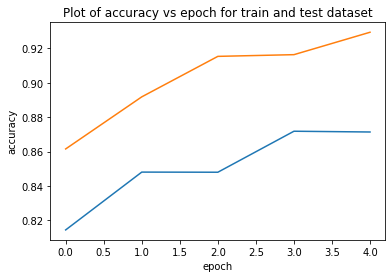

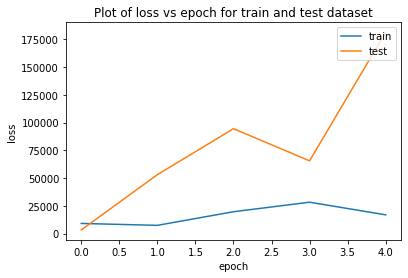

788/788 [==============================] - 1s 840us/step


In [30]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

cnnpredictions = cnnmodel.predict(X_test, verbose=1)
cnn_predict=np.argmax(cnnpredictions,axis=1)

y_pred = cnnmodel.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

In [31]:
dl_acc = accuracy_score(y_pred, y_test)
dl_prec = precision_score(y_pred, y_test,average='weighted')
dl_rec = recall_score(y_pred, y_test,average='weighted')
dl_f1 = f1_score(y_pred, y_test,average='weighted')

storeResults('CNN',dl_acc,dl_prec,dl_rec,dl_f1)

# LSTM

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
from keras import regularizers
import tensorflow as tf

# define a function to build the keras model
def create_model(input_shape):
    # create model
    d = 0.25
    model = Sequential()
    
    model.add(LSTM(32, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(64, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(256, input_shape=input_shape, activation='relu', return_sequences=False))
    model.add(Dropout(d))
   
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # compile model
    adam = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.00001)
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model(input_shape=(14,1))
#print(model.summary())

In [33]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=5, verbose=1, steps_per_epoch=500, validation_steps=500)

Epoch 1/5
500/500 [==============================] - 42s 40ms/step - loss: 2.8489e-07 - accuracy: 0.3301 - val_loss: 2.6531e-07 - val_accuracy: 0.3692
Epoch 2/5
500/500 [==============================] - 18s 36ms/step - loss: 2.7837e-07 - accuracy: 0.3466 - val_loss: 2.6531e-07 - val_accuracy: 0.3692
Epoch 3/5
500/500 [==============================] - 19s 39ms/step - loss: 2.6056e-07 - accuracy: 0.3839 - val_loss: 2.6531e-07 - val_accuracy: 0.3692
Epoch 4/5
500/500 [==============================] - 20s 41ms/step - loss: 2.6650e-07 - accuracy: 0.3703 - val_loss: 2.6531e-07 - val_accuracy: 0.3692
Epoch 5/5
500/500 [==============================] - 23s 47ms/step - loss: 2.6722e-07 - accuracy: 0.3672 - val_loss: 2.6531e-07 - val_accuracy: 0.3692


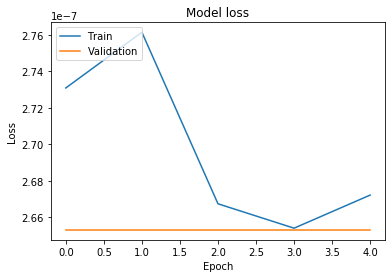

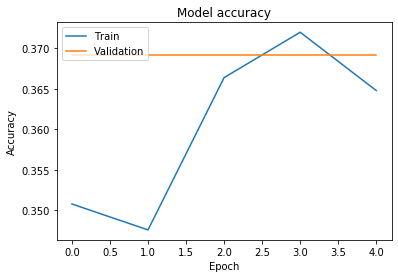

788/788 [==============================] - 19s 21ms/step


In [34]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)


#y_prob = cnnmodel.predict_proba(X_test)[:, 1]



In [35]:
dl_acc = accuracy_score(y_pred, y_test)
dl_prec = precision_score(y_pred, y_test,average='weighted')
dl_rec = recall_score(y_pred, y_test,average='weighted')
dl_f1 = f1_score(y_pred, y_test,average='weighted')

storeResults('LSTM',dl_acc,dl_prec,dl_rec,dl_f1)

# CNN LSTM

In [36]:
import tensorflow as tf
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(5)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 64)            384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 32)            6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 128)           82432     
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [37]:
modelhistory = model.fit(X_train, Y_train, epochs=5, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/5
20156/20156 [==============================] - 166s 8ms/step - loss: 0.0338 - acc: 0.9293 - val_loss: 0.0178 - val_acc: 0.9428
Epoch 2/5
20156/20156 [==============================] - 180s 9ms/step - loss: 0.0237 - acc: 0.9466 - val_loss: 0.0176 - val_acc: 0.9462
Epoch 3/5
20156/20156 [==============================] - 226s 11ms/step - loss: 0.0226 - acc: 0.9485 - val_loss: 0.0164 - val_acc: 0.9487
Epoch 4/5
20156/20156 [==============================] - 201s 10ms/step - loss: 0.0221 - acc: 0.9489 - val_loss: 0.0147 - val_acc: 0.9580
Epoch 5/5
20156/20156 [==============================] - 200s 10ms/step - loss: 0.0204 - acc: 0.9530 - val_loss: 0.0139 - val_acc: 0.9600


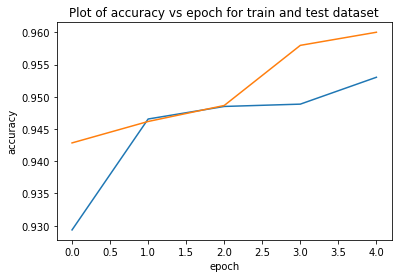

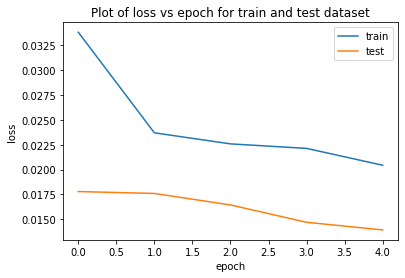

788/788 [==============================] - 6s 8ms/step


In [38]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['acc'])
plt.plot(modelhistory.history['val_acc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

cnnpredictions = model.predict(X_test, verbose=1)
cnn_predict=np.argmax(cnnpredictions,axis=1)

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

In [39]:
dl_acc = accuracy_score(y_pred, y_test)
dl_prec = precision_score(y_pred, y_test,average='weighted')
dl_rec = recall_score(y_pred, y_test,average='weighted')
dl_f1 = f1_score(y_pred, y_test,average='weighted')

storeResults('CNNLSTM',dl_acc,dl_prec,dl_rec,dl_f1)

# DNN with Bagging

In [40]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [41]:
import matplotlib.pyplot as plt
n_train = np.array(X_train)
n_test = np.array(X_test)

12
(100778, 12)


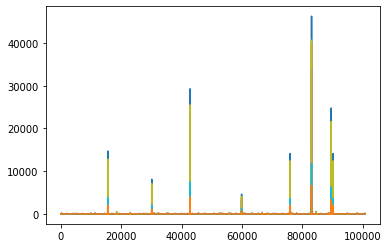

In [42]:
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf

input_dim = n_train.shape[1]
feature_dim = [25, 20, 15, 10]
print(input_dim)
inputs = Input(shape=(input_dim,))
encoded = inputs
encoded = Dense(feature_dim[0], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[1], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[2], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[3], kernel_initializer="uniform")(encoded)

decoded = encoded
decoded = Dense(feature_dim[2], kernel_initializer="uniform")(decoded)
decoded = Dense(feature_dim[1], kernel_initializer="uniform")(decoded)
decoded = Dense(feature_dim[0], kernel_initializer="uniform")(decoded)
decoded = Dense(input_dim, kernel_initializer="uniform")(decoded)


autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

autoencoder.fit(n_train, n_train,
                verbose=0,
                epochs=10,
                batch_size=2,
                shuffle=True,
                validation_data=(n_test, n_test))

predict_vals = autoencoder.predict(n_train)
print(predict_vals.shape)
plt.plot(predict_vals)
plt.show()

In [43]:
from keras.models import Sequential

featuremodel = Sequential()
featuremodel.add(Dense(feature_dim[0], input_shape=(input_dim,), weights=autoencoder.layers[1].get_weights()))
featuremodel.add(Dense(feature_dim[1], weights=autoencoder.layers[2].get_weights()))
featuremodel.add(Dense(feature_dim[2], weights=autoencoder.layers[3].get_weights()))
featuremodel.add(Dense(feature_dim[3], weights=autoencoder.layers[4].get_weights()))

featuremodel.compile(optimizer='adadelta', loss='mse')

from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
model4 = BaggingClassifier(MLPClassifier(),n_estimators=10, random_state=0)
model4.fit(X_train,y_train)

BaggingClassifier(base_estimator=MLPClassifier(), random_state=0)

In [44]:
# classic svm with deep autoencoder
deepmodel = model4
deepmodel.fit(featuremodel.predict(n_train),y_train)
deepprediction=deepmodel.predict(featuremodel.predict(n_test))
#print("Accuracy : %s" % "{0:.3%}".format(metrics.accuracy_score(deepprediction, y_test)))

In [45]:
dnn_acc = accuracy_score(deepprediction, y_test)
dnn_prec = precision_score(deepprediction, y_test,average='weighted')
dnn_rec = recall_score(deepprediction, y_test,average='weighted')
dnn_f1 = f1_score(deepprediction, y_test,average='weighted')

In [46]:
storeResults('DNN',dnn_acc,dnn_prec,dnn_rec,dnn_f1)

# Comparison

In [47]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                        
                      })

In [48]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,CNN,0.927,0.933,0.927,0.940
1,LSTM,0.364,0.534,0.364,1.000
2,CNNLSTM,0.958,0.964,0.958,0.971
3,DNN,0.860,0.863,0.860,0.868


In [49]:
model.save('model_nsl.h5')

# Graph

In [50]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

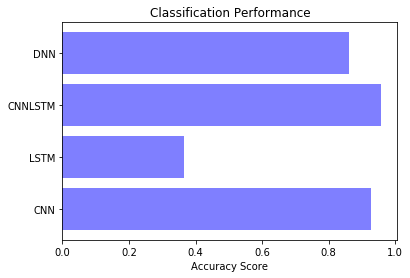

In [51]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

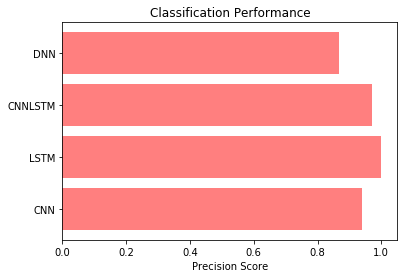

In [52]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

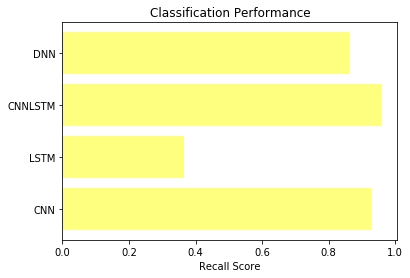

In [53]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

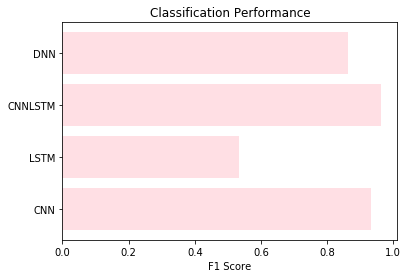

In [54]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()